Importing the Dependencies

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Dataset

In [37]:
#Loading the dataset
data=pd.read_csv('/content/creditcard.csv')

In [38]:
#First five rows of the dataset
data.head()
#Here the column names or features are not clear since they are sensitive.
#These all are converted using Principal Component Analysis(PCA) and provided to us

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [39]:
#dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [40]:
#Checking missing values
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [41]:
#Distribution of the legit and fraud transactions
data['Class'].value_counts()

,count
Class,
0,284315
1,492


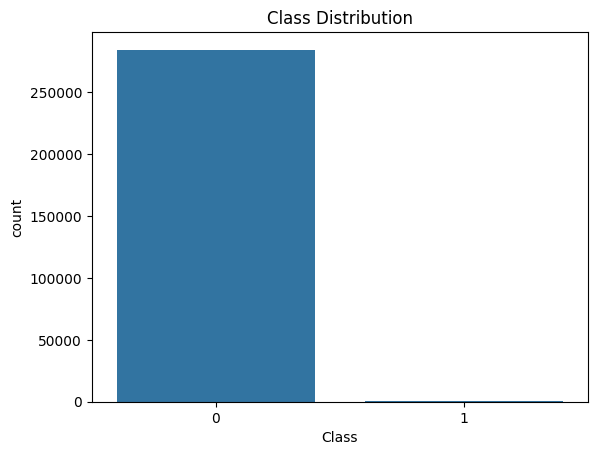

In [42]:
sns.countplot(x=data['Class'])
plt.title("Class Distribution")
plt.show()

The Dataset is highly imbalanced

0--->Legit Transaction

1--->Fraud Transaction

In [43]:
#Compare the values of both transactions
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [44]:
legit=data[data.Class==0]
fraud=data[data.Class==1]

UnderSampling the Data

In [45]:
legit_sample=legit.sample(n=492)

Concatenate the both classes

In [46]:
new_data=pd.concat([legit_sample,fraud],axis=0)

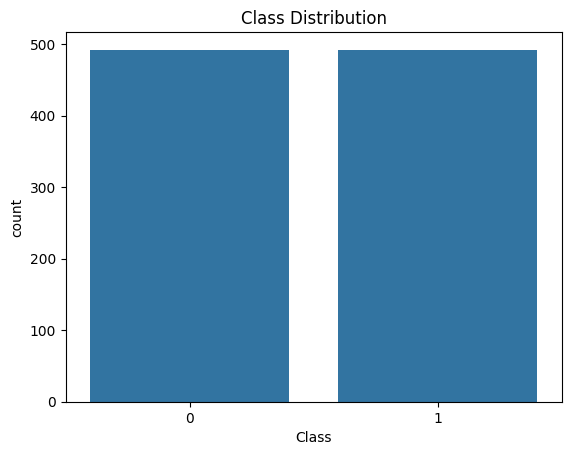

In [47]:
sns.countplot(x=new_data['Class'])
plt.title("Class Distribution")
plt.show()

We can compare the means of the data before and after undersampling.

There is no much difference indicating that the dataset doesnot change it's characterstics except it's size.

In [48]:
#Compare the values of both transactions
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95739.197154,-0.151188,-0.041140,-0.129517,-0.002344,-0.065834,0.088488,0.013534,0.051163,-0.039318,...,0.057158,0.008776,0.070115,0.010744,0.037879,-0.008654,0.011237,-0.018163,0.004441,108.928191
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Seperate the target from the features

In [49]:
X=new_data.drop('Class',axis=1)
Y=new_data['Class']

In [50]:
#Train Test Split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [51]:
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("Y_train shape:",Y_train.shape)
print("Y_test shape:",Y_test.shape)

X_train shape: (787, 30)
X_test shape: (197, 30)
Y_train shape: (787,)
Y_test shape: (197,)


Standardizing only Amount and Time because remaining features were already done using PCA.

In [52]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train[['Amount','Time']]=scaler.fit_transform(X_train[['Amount','Time']])
X_test[['Amount','Time']]=scaler.transform(X_test[['Amount','Time']])

Applying SMOTE to the trained data.

Test data should not be included because test data should be always a real world data.So,better not to apply SMOTE

In [60]:
#Fitting the model
def train_and_evaluate(model,name):
  #Fitting the model
  model.fit(X_train,Y_train)
  #Checking the accuracies of training and testing to know whether the model is overfitted or underfitted
  training_accuracy=accuracy_score(model.predict(X_train),Y_train)
  testing_accuracy=accuracy_score(model.predict(X_test),Y_test)
  print(f"*****{name}*****")
  print("Training Accuracy:",training_accuracy)
  print("Testing Accuracy:",testing_accuracy)
  print("Classification Report")
  print(classification_report(model.predict(X_test),Y_test))
  print("Confusion Matrix ")
  cm=confusion_matrix(model.predict(X_test),Y_test)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d')



*   Logistic Regression Model.



*****Logistic Regression*****
Training Accuracy: 0.9542566709021602
Testing Accuracy: 0.9441624365482234
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       106
           1       0.91      0.98      0.94        91

    accuracy                           0.94       197
   macro avg       0.94      0.95      0.94       197
weighted avg       0.95      0.94      0.94       197

Confusion Matrix 


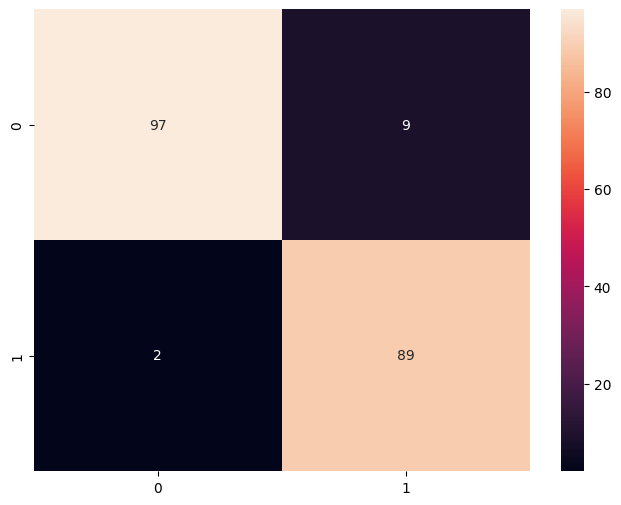

In [61]:
model_lr=LogisticRegression()
train_and_evaluate(model_lr,"Logistic Regression")

Since the accuracies of both training and testing is almost similar,the model(Logistic Regression) is neither underfitted nor overfitted.



*   SVM Model



*****SVM*****
Training Accuracy: 0.9428208386277002
Testing Accuracy: 0.9289340101522843
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       111
           1       0.87      0.99      0.92        86

    accuracy                           0.93       197
   macro avg       0.93      0.94      0.93       197
weighted avg       0.94      0.93      0.93       197

Confusion Matrix 


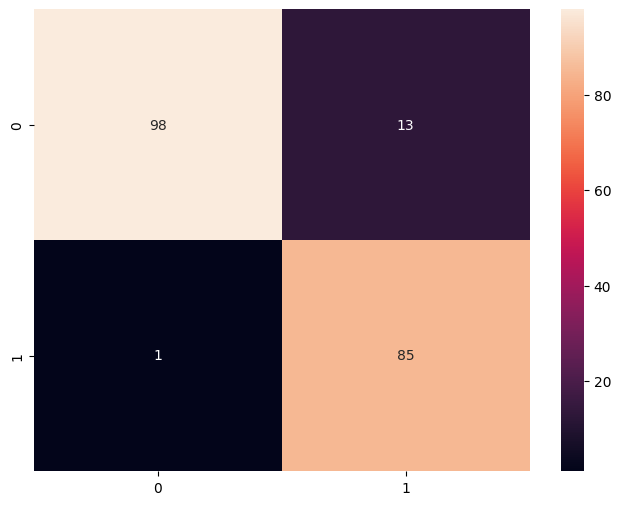

In [62]:
model_svm=SVC()
train_and_evaluate(model_svm,"SVM")



*   Random Forest Classifier



*****Random Forest*****
Training Accuracy: 1.0
Testing Accuracy: 0.9187817258883249
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       107
           1       0.88      0.96      0.91        90

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197

Confusion Matrix 


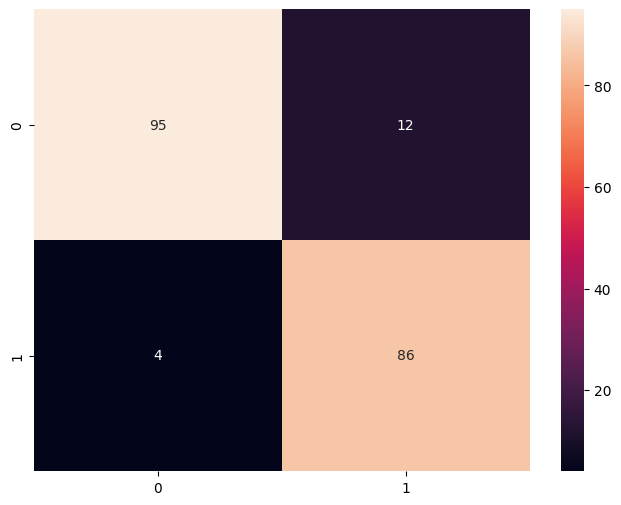

In [63]:
model_rf=RandomForestClassifier()
train_and_evaluate(model_rf,"Random Forest")



*   XGBOOST Model



*****XGBOOST*****
Training Accuracy: 1.0
Testing Accuracy: 0.934010152284264
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       106
           1       0.90      0.97      0.93        91

    accuracy                           0.93       197
   macro avg       0.93      0.94      0.93       197
weighted avg       0.94      0.93      0.93       197

Confusion Matrix 


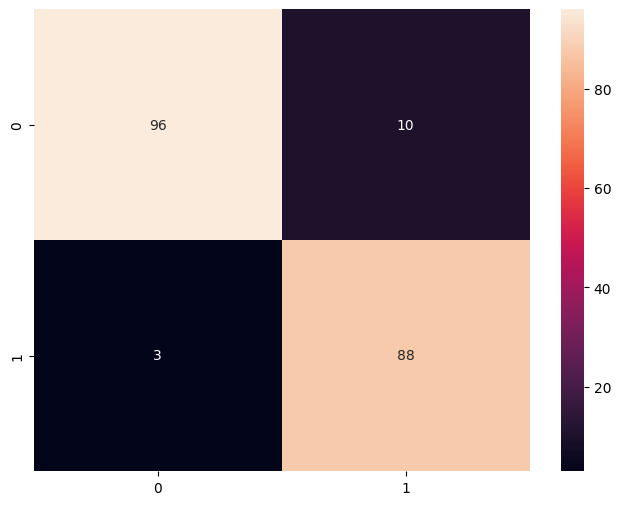

In [64]:
model_xgb=XGBClassifier()
train_and_evaluate(model_xgb,"XGBOOST")